# Лабораторная работа 8. Обработка естественого языка. Начало

Обработка естественного языка (NLP) – это технология машинного обучения, которая дает компьютерам возможность интерпретировать, манипулировать и понимать человеческий язык. Сегодня организации имеют большие объемы голосовых и текстовых данных из различных каналов связи, таких как электронные письма, текстовые сообщения, новостные ленты социальных сетей, видео, аудио и многое другое. Они используют программное обеспечение NLP для автоматической обработки этих данных, анализа намерений или настроений в сообщении и реагирования на человеческое общение в режиме реального времени.



Обработка естественного языка сочетает в себе компьютерную лингвистику, машинное обучение и модели глубокого обучения для обработки человеческого языка.

**Компьютерная лингвистика**
Компьютерная лингвистика – это наука о понимании и построении моделей человеческого языка с помощью компьютеров и программных инструментов. Исследователи используют методы компьютерной лингвистики, такие как синтаксический и семантический анализ, для создания платформ, помогающих машинам понимать разговорный человеческий язык. Такие инструменты, как переводчики языков, синтезаторы текста в речь и программное обеспечение для распознавания речи, основаны на компьютерной лингвистике. 

**Машинное обучение**
Машинное обучение – это технология, которая обучает компьютер с помощью выборочных данных для повышения его эффективности. Человеческий язык имеет несколько особенностей, таких как сарказм, метафоры, вариации в структуре предложений, а также исключения из грамматики и употребления, на изучение которых у людей уходят годы. Программисты используют методы машинного обучения, чтобы научить приложения NLP распознавать и точно понимать эти функции с самого начала.

**Глубокое обучение**
Глубокое обучение – это особая область машинного обучения, которая учит компьютеры учиться и мыслить как люди. Это включает нейросеть, состоящую из узлов обработки данных, напоминающих операции человеческого мозга. С помощью глубокого обучения компьютеры распознают, классифицируют и сопоставляют сложные закономерности во входных данных.



## Этапы обработки
В NLP используются методы предварительной обработки, такие как:
1. токенизация, 
2. стемминг, лемматизация 
3. удаление стоп-слов

In [ ]:
!pip install -U spacy
!pip install -U spacy-lookups-data
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 31.8 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.3 MB/s eta 0:00:00
2023-05-22 02:33:17.545562: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 02:33:19.576556: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-pyt

## Tokenization

In [ ]:
## tokenizing a piecen of text
doc = "I love coding and writing"
for i, w in enumerate(doc.split(" ")):
    print("Token " + str(i) + ": " + w)

Token 0: I
Token 1: love
Token 2: coding
Token 3: and
Token 4: writing


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc2 = nlp('Im student')
[token for token in doc2]

[I, m, student]

## Удаление стоп-слов

In [ ]:
my_stopwords = nlp.Defaults.stop_words
type(my_stopwords)

set

In [ ]:
my_stopwords.add('f*ck')

In [ ]:
# кто помнит Майка Чумакова, тот поймет
doc = nlp('I love f*ck you')
[token for token in doc if token.lower_ not in my_stopwords]

[love]

## Lemmatization

In [ ]:
## import the libraries
import spacy
from spacy.lookups import Lookups

nlp = spacy.load("en_core_web_sm")

## lemmatization
# токенизация (получение объекта doc)
doc = nlp(u'I love coding and writing')
# лемматизация
for word in doc:
    print(word.text, "=>", word.lemma_)
data_lematized = [word.lemma_ for word in doc]
data_lematized

I => I
love => love
coding => code
and => and
writing => write


['I', 'love', 'code', 'and', 'write']

## Stemming

# Word embedding -- векторное представление слов 




## Bag of words

Рассмотрим самый простой способ приведения текста к набору чисел. Для каждого слова посчитаем, как часто оно встречается в тексте. Результаты запишем в таблицу. Строки будут представлять тексты, столбцы -- слова. Если на пересечении строки с столбца стоит число 5, значит данное слово встретилось в данном тексте 5 раз. В большинстве ячеек будут нули. Поэтому хранить это всё удобнее в виде разреженных матриц (т.е. хранить только ненулевые значения).

Таким образом, при построении "мешка слов" можно выделить следующие действия:

1. Токенизация.

2. Построение словаря: собираем все слова, которые встречались в текстах и пронумеровываем их (по алфавиту, например).

3. Построение разреженной матрицы. В sklearn алгоритм приведения текста в bag-of-words реализован в виде класса CountVectorizer. 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
texts = ["Великолепный сериал, который поможет успокоить нервы при любых стрессах и просто скрасит серые будни",
         "Пожалуй, если бы я посмотрел только первые пару сезонов этого сериала, я бы с легкой руки написал ему положительную рецензию",
         "В общем, если создатели этого сериала не вернут всё на круги своя, то рейтинги следующих сезонов будут становится все ниже и ниже, а зрительская аудитория будет все меньше и меньше."]

bow = count_vectorizer.fit_transform(texts)
bow.shape

(3, 48)

Результат содержит 3 строки (для 3 текстов) и 48 столбцов (для 48 разных слов). Посмотрим словарь:

In [ ]:
count_vectorizer.vocabulary_

{'великолепный': 5,
 'сериал': 36,
 'который': 12,
 'поможет': 27,
 'успокоить': 46,
 'нервы': 20,
 'при': 29,
 'любых': 15,
 'стрессах': 43,
 'просто': 30,
 'скрасит': 39,
 'серые': 38,
 'будни': 2,
 'пожалуй': 25,
 'если': 10,
 'бы': 4,
 'посмотрел': 28,
 'только': 45,
 'первые': 24,
 'пару': 23,
 'сезонов': 35,
 'этого': 47,
 'сериала': 37,
 'легкой': 14,
 'руки': 33,
 'написал': 18,
 'ему': 9,
 'положительную': 26,
 'рецензию': 32,
 'общем': 22,
 'создатели': 41,
 'не': 19,
 'вернут': 6,
 'всё': 8,
 'на': 17,
 'круги': 13,
 'своя': 34,
 'то': 44,
 'рейтинги': 31,
 'следующих': 40,
 'будут': 3,
 'становится': 42,
 'все': 7,
 'ниже': 21,
 'зрительская': 11,
 'аудитория': 0,
 'будет': 1,
 'меньше': 16}

In [ ]:
bow.todense()

matrix([[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
         0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
         0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 1],
        [1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0,
         2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
         1, 0, 1, 0, 0, 1]])

Как видим, ни стемминга, ни лемматизации по умолчанию не производится.
Поэтому для уменьшения размерности данной матрицы требуется производить лемматизацию/стемминг и удаления стоп-слов. 

**Параметр min_df**

Помимо выше озвученных есть и другие способы отсечения лишнего. Например, можно откидывать слова, которые встречаются слишком редко, с помощью параметра min_df. Установив min_df=2 мы откинем, все слова, которые встречаются менее, чем в 2 документах.

In [ ]:
count_vectorizer = CountVectorizer(min_df=2)
bow = count_vectorizer.fit_transform(texts)
count_vectorizer.vocabulary_

{'если': 0, 'сезонов': 1, 'этого': 3, 'сериала': 2}

**Биграммы, триграммы, n-граммы**

По умолчанию bag-of-words (как следует из названия) представляет собой просто мешок слов. То есть для него предложения "It's not good, it's bad!" и "It's not bad, it's good!" абсолютно эквивалентны. Понятно, что при этом теряется много информации. Можно рассматривать не только отдельные слова, а последовательности длиной из 2 слов (биграммы), из 3 слов (триграммы) или в общем случае из n слов (n-граммы). На практике обычно задаётся диапазон от 1 до n.

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1,2), min_df=2)
bow = count_vectorizer.fit_transform(texts)
print(count_vectorizer.vocabulary_)

print(count_vectorizer.transform(['Если несколько сезонов']).todense())
print(count_vectorizer.transform(['Этого сериала этого сезонов сезонов']).todense())

{'если': 0, 'сезонов': 1, 'этого': 3, 'сериала': 2, 'этого сериала': 4}
[[1 1 0 0 0]]
[[0 2 1 2 1]]


**Ограничение количества признаков**

Понятно, что с ростом n количество выделенных n-грамм быстро растёт. Для ограничения количества признаков можно использовать параметр max_features. В этом случае будет создано не более max_features признаков (будут выбраны самые часто встречающиеся слова и последовательности слов). Например:

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1,2), max_features=25)
bow = count_vectorizer.fit_transform(texts)
count_vectorizer.vocabulary_

{'поможет': 7,
 'при': 11,
 'просто': 13,
 'поможет успокоить': 8,
 'при любых': 12,
 'просто скрасит': 14,
 'если': 2,
 'бы': 0,
 'посмотрел': 9,
 'сезонов': 21,
 'этого': 23,
 'сериала': 22,
 'руки': 17,
 'положительную': 5,
 'рецензию': 16,
 'посмотрел только': 10,
 'этого сериала': 24,
 'руки написал': 18,
 'положительную рецензию': 6,
 'своя': 19,
 'все': 1,
 'ниже': 4,
 'меньше': 3,
 'своя то': 20,
 'рейтинги следующих': 15}

## TF-IDF

У подхода bag-of-words есть существенный недостаток. Если слово встречается 5 раз в конкретном документе, но и в других документах тоже встречается часто, то его наличие в документе не особо-то о чём-то говорит. Если же слово 5 раз встречается в конкретном документе, но в других документах встречается редко, то его наличие (да ещё и многократное) позволяет хорошо отличать этот документ от других. Однако с точки зрения bag-of-words различий не будет: в обеих ячейках будет просто число 5.

Отчасти это решается исключением стоп-слов (и слишком часто встречающихся слов), но лишь отчасти. Другой идеей является отмасштабировать получившуюся таблицу с учётом "редкости" слова в наборе документов (т.е. с учётом информативности слова).

$tfidf=tf∗idf$

$idf=\log\frac{(N+1)}{(Nw+1)}+1$

Здесь tf это частота слова в тексте (то же самое, что в bag of words), N - общее число документов, Nw - число документов, содержащих данное слово.

То есть для каждого слова считается отношение общего количества документов к количеству документов, содержащих данное слово (для частых слов оно будет ближе к 1, для редких слов оно будет стремиться к числу, равному количеству документов), и на логарифм от этого числа умножается исходное значение bag-of-words (к числителю и знаменателю прибавляется единичка, чтобы не делить на 0, и к логарифму тоже прибавляется единичка, но это уже технические детали). После этого в sklearn ещё проводится L2-нормализация каждой строки.

В sklearn есть класс для поддержки TF-IDF: TfidfVectorizer, рассмотрим его.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(texts)
tfidf_vectorizer.vocabulary_

{'великолепный': 5,
 'сериал': 36,
 'который': 12,
 'поможет': 27,
 'успокоить': 46,
 'нервы': 20,
 'при': 29,
 'любых': 15,
 'стрессах': 43,
 'просто': 30,
 'скрасит': 39,
 'серые': 38,
 'будни': 2,
 'пожалуй': 25,
 'если': 10,
 'бы': 4,
 'посмотрел': 28,
 'только': 45,
 'первые': 24,
 'пару': 23,
 'сезонов': 35,
 'этого': 47,
 'сериала': 37,
 'легкой': 14,
 'руки': 33,
 'написал': 18,
 'ему': 9,
 'положительную': 26,
 'рецензию': 32,
 'общем': 22,
 'создатели': 41,
 'не': 19,
 'вернут': 6,
 'всё': 8,
 'на': 17,
 'круги': 13,
 'своя': 34,
 'то': 44,
 'рейтинги': 31,
 'следующих': 40,
 'будут': 3,
 'становится': 42,
 'все': 7,
 'ниже': 21,
 'зрительская': 11,
 'аудитория': 0,
 'будет': 1,
 'меньше': 16}

Словарь содержит те же 48 значений, которые были бы и для CountVectorizer. Но значения в таблице другие:

In [ ]:
tfidf.todense()

matrix([[0.        , 0.        , 0.2773501 , 0.        , 0.        ,
         0.2773501 , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.2773501 , 0.        , 0.        ,
         0.2773501 , 0.        , 0.        , 0.        , 0.        ,
         0.2773501 , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.2773501 , 0.        , 0.2773501 ,
         0.2773501 , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.2773501 , 0.        , 0.2773501 , 0.2773501 ,
         0.        , 0.        , 0.        , 0.2773501 , 0.        ,
         0.        , 0.2773501 , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.48065817,
         0.        , 0.        , 0.        , 0.        , 0.24032909,
         0.18277647, 0.        , 0.        , 0.        , 0.24032909,
         0.        , 0.        , 0.        , 0.24032909, 0.        ,
         0.        , 0.        , 0.        , 0.24032909, 

Ненулевые значения находятся на тех же местах, но отмасштабированы в зависимости от частоты слов.

**Параметр sublinear_tf**

Большая часть параметров у CountVectorizer и TfidfVectorizer одинакова. Но у TfidfVectorizer есть один важный дополнительный параметр.

Как видно из формулы tfidf = tf * idf, если слово будет встречаться не один, а два раза, то tfidf вырастет в два раза. Если слово будет встречаться не один, а 10 раз, то tfidf вырастет почти в 10 раз. В качестве примера добавим в третью строку ещё пару слов меньше

In [ ]:
texts = ["Великолепный сериал, который поможет успокоить нервы при любых стрессах и просто скрасит серые будни",
         "Пожалуй, если бы я посмотрел только первые пару сезонов этого сериала, я бы с легкой руки написал ему положительную рецензию",
         "В общем, если создатели этого сериала не вернут всё на круги своя, то рейтинги следующих сезонов будут становится все ниже и ниже, а зрительская аудитория будет все меньше и меньше и меньше и меньше."]
TfidfVectorizer().fit_transform(texts).todense()[2]         

matrix([[0.15373049, 0.15373049, 0.        , 0.15373049, 0.        ,
         0.        , 0.15373049, 0.30746099, 0.15373049, 0.        ,
         0.116916  , 0.15373049, 0.        , 0.15373049, 0.        ,
         0.        , 0.61492198, 0.15373049, 0.        , 0.15373049,
         0.        , 0.30746099, 0.15373049, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.15373049, 0.        , 0.        , 0.15373049,
         0.116916  , 0.        , 0.116916  , 0.        , 0.        ,
         0.15373049, 0.15373049, 0.15373049, 0.        , 0.15373049,
         0.        , 0.        , 0.116916  ]])

Значение tfidf слова "меньше" выросло с 0.36325471 до 0.61492198, а остальные упали .

Вопрос - хотим ли мы таких сильных изменений. Если не хотим, то можно использовать параметр sublinear_tf=True. При его использовании вместо tf будет браться 1 + log(tf). То есть по-прежнему с ростом tf будет расти и tfidf, но уже не так радикально (и соответственно остальные значения будут уменьшаться не так быстро). Для некоторых задач это может дать прирост в качестве.

In [ ]:
TfidfVectorizer(sublinear_tf=True).fit_transform(texts).todense()[2]

matrix([[0.18336592, 0.18336592, 0.        , 0.18336592, 0.        ,
         0.        , 0.18336592, 0.31046549, 0.18336592, 0.        ,
         0.13945451, 0.18336592, 0.        , 0.18336592, 0.        ,
         0.        , 0.43756505, 0.18336592, 0.        , 0.18336592,
         0.        , 0.31046549, 0.18336592, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.18336592, 0.        , 0.        , 0.18336592,
         0.13945451, 0.        , 0.13945451, 0.        , 0.        ,
         0.18336592, 0.18336592, 0.18336592, 0.        , 0.18336592,
         0.        , 0.        , 0.13945451]])

In [ ]:
doc[0].vector.shape

(96,)

# LDA

LDA принадлежит семейству порождающий вероятностных моделей, в которых темы представлены вероятностями появления каждого слова из заданного набора. Документы в свою очередь могут быть представлены как сочетания тем. Уникальная особенность моделей LDA состоит в том что темы не обязательно должны быть различными и слова могут встречаться в нескольких темах; это придает некоторую нечеткость определяемым темам, что может пригодиться для совладения с гибкостью языка.

Для проведения тематического моделирования с помощью LDA можно использовать [sklearn.decomposition.LatentDirichletAllocation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

In [ ]:
from time import time
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [ ]:
n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [ ]:
print("Loading dataset...")
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]

Loading dataset...


In [ ]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(data_samples)

Extracting tf features for LDA...


In [ ]:
tf.shape

(2000, 1000)

In [ ]:
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf)

In [ ]:
tf_vectorizer.get_feature_names_out()

array(['00', '000', '10', '100', '11', '12', '128', '13', '130', '14',
       '15', '16', '17', '18', '19', '1992', '1993', '20', '200', '21',
       '22', '23', '24', '25', '250', '26', '27', '28', '29', '2nd', '30',
       '300', '31', '32', '33', '34', '35', '36', '37', '38', '3d', '40',
       '42', '43', '44', '45', '48', '49', '50', '500', '51', '55', '60',
       '66', '70', '72', '75', '80', '800', '86', '90', '92', '93', '__',
       'able', 'ac', 'accept', 'access', 'according', 'act', 'action',
       'actually', 'add', 'added', 'addition', 'address',
       'administration', 'advance', 'age', 'ago', 'agree', 'aids', 'air',
       'al', 'allow', 'allowed', 'alt', 'america', 'american', 'amiga',
       'analysis', 'anonymous', 'answer', 'answers', 'anti', 'anybody',
       'apartment', 'appears', 'apple', 'application', 'applications',
       'apply', 'appreciated', 'approach', 'appropriate', 'apr', 'april',
       'archive', 'area', 'areas', 'aren', 'argument', 'armenia',
  

In [ ]:
# матрица темы-слова
lda.components_.shape

(10, 1000)

In [ ]:
# матрица документы-темы
lda.transform(tf).shape

(2000, 10)

In [ ]:
print_top_words(lda, tf_vectorizer.get_feature_names_out(), 10)

Topic #0:
edu com mail send graphics ftp pub available contact version
Topic #1:
don like just think know ve good way people right
Topic #2:
think christian book atheism new pittsburgh president like game just
Topic #3:
drive windows disk thanks use card drives hard using software
Topic #4:
hiv health aids april disease research care medical information 1993
Topic #5:
god people does jesus law say just life don israel
Topic #6:
10 55 11 15 game 12 18 team 20 19
Topic #7:
car year new bike cars good engine just price oil
Topic #8:
people said didn went did know time just like took
Topic #9:
key space government public use law encryption section keys earth


# Задание
Используя данные https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
1. Самостоятельно реализовать BoW, TF-IDF
2. Решить задачу классификации с понижением размерности. Использовать самостоятельно реализованные модели из предыдущих ЛР.
3. Решить задачу мягкой кластеризации (ТМ) с помощью LDA


In [7]:
import pandas as pd
import numpy as np

## Загрузка данных

In [8]:
data = pd.read_csv('../data/spam.csv',  encoding='cp1251')
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## BoW

In [5]:
import spacy
from spacy.lang.ru import Russian
import re
import pandas as pd

class CountVectorizer:
  
    def __init__(self):
        self.text = []
        self.matrix = []
    
    def tokenization(self, doc):
        for i,w in enumerate(doc):
            w = re.sub(r'[^\w\s]','', w) 
            k = w.split()
            for j in k:
                self.text.append(j.lower())
        nlp = Russian()
        self.my_stopwords = nlp.Defaults.stop_words
        self.text = [token for token in self.text if token.lower() not in self.my_stopwords]
        return self.text
    
    def vocabulary(self, doc):
        doc1 = self.tokenization(doc)
        self.voc = dict((i, doc1.index(i)) for i in doc1)
        return self.voc
    
    def arrayprint(self, a):
        for i in a:
            print(*i)
    
    def todense(self):
        self.m = []
        keys = [i for i, j in self.voc.items()]
        for i,w in enumerate(doc):
            self.matrix.append(w)
  
        for i in range(len(self.matrix)):
            self.matrix[i] = re.sub(r'[^\w\s]','', self.matrix[i]) 
            self.matrix[i] = self.matrix[i].split()
 
        for i in range(len(self.matrix)):
          for j in range(len(self.matrix[i])):
                self.matrix[i][j] = self.matrix[i][j].lower()
        for i,w in enumerate(self.matrix):
            vector = []
            for word in keys:
                if word in w:
                    vector.append(w.count(word))
                else:
                    vector.append(0)
            self.m.append(vector)

        return self.arrayprint(self.m)

In [6]:
doc = ["Великолепный  сериал, который поможет успокоить нервы при любых стрессах и просто скрасит серые будни",
         "Пожалуй, если бы я посмотрел только первые пару сезонов этого сериала, я бы с легкой руки написал ему положительную рецензию",
         "В общем, если создатели этого сериала не вернут всё на круги своя, то рейтинги следующих сезонов будут становится все ниже и ниже, а зрительская аудитория будет все меньше и меньше."]

c = CountVectorizer()
c.vocabulary(doc)

{'великолепный': 0,
 'сериал': 1,
 'поможет': 2,
 'успокоить': 3,
 'нервы': 4,
 'стрессах': 5,
 'скрасит': 6,
 'серые': 7,
 'будни': 8,
 'посмотрел': 9,
 'первые': 10,
 'пару': 11,
 'сезонов': 12,
 'сериала': 13,
 'легкой': 14,
 'руки': 15,
 'написал': 16,
 'положительную': 17,
 'рецензию': 18,
 'общем': 19,
 'создатели': 20,
 'вернут': 22,
 'круги': 23,
 'рейтинги': 24,
 'следующих': 25,
 'становится': 27,
 'зрительская': 28,
 'аудитория': 29}

In [11]:
c.todense()

1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1


## TF-IDF

In [20]:
import math
from sklearn import preprocessing

class TfidfVectorizer:
    def __init__(self):
        self.text = []
        self.matrix = []
    def tokenization(self, doc):
        for i,w in enumerate(doc):
            w = re.sub(r'[^\w\s]','', w) 
            k = w.split()
            for j in k:
                self.text.append(j.lower())
        nlp = Russian()
        self.my_stopwords = nlp.Defaults.stop_words
        self.text = [token for token in self.text if token.lower() not in self.my_stopwords]
        return self.text
  
    def vocabulary(self, doc):
        doc1 = self.tokenization(doc)
        self.voc = dict((i, doc1.index(i)) for i in doc1)
        return self.voc
    def arrayprint(self, a):
        for i in a:
            print(*i)
    def idf(self, word):
        for i,w in enumerate(self.matrix):
            n = 0
            if word in w:
                n += 1
        return math.log(len(self.matrix)+1/(n+1)) + 1

    def todense(self):
        self.m = []
        keys = [i for i, j in self.voc.items()]
        for i,w in enumerate(doc):
            self.matrix.append(w)
  
        for i in range(len(self.matrix)):
            self.matrix[i] = re.sub(r'[^\w\s]','', self.matrix[i]) 
            self.matrix[i] = self.matrix[i].split()
 
        for i in range(len(self.matrix)):
           for j in range(len(self.matrix[i])):
                self.matrix[i][j] = self.matrix[i][j].lower()
        for i,w in enumerate(self.matrix):
            vector = []
            for word in keys:
                if word in w:
                      vector.append(w.count(word)*self.idf(word))
                else:
                      vector.append(0)
            self.m.append(vector)
        self.m = preprocessing.normalize(self.m, norm='l2')

        return self.arrayprint(self.m)

In [21]:
doc = ["Великолепный сериал, который поможет успокоить нервы при любых стрессах и просто скрасит серые будни",
         "Пожалуй, если бы я посмотрел только первые пару сезонов этого сериала, я бы с легкой руки написал ему положительную рецензию",
         "В общем, если создатели этого сериала не вернут всё на круги своя, то рейтинги следующих сезонов будут становится все ниже и ниже, а зрительская аудитория будет все меньше и меньше."]
c = TfidfVectorizer()
c.vocabulary(doc)

{'великолепный': 0,
 'сериал': 1,
 'поможет': 2,
 'успокоить': 3,
 'нервы': 4,
 'стрессах': 5,
 'скрасит': 6,
 'серые': 7,
 'будни': 8,
 'посмотрел': 9,
 'первые': 10,
 'пару': 11,
 'сезонов': 12,
 'сериала': 13,
 'легкой': 14,
 'руки': 15,
 'написал': 16,
 'положительную': 17,
 'рецензию': 18,
 'общем': 19,
 'создатели': 20,
 'вернут': 22,
 'круги': 23,
 'рейтинги': 24,
 'следующих': 25,
 'становится': 27,
 'зрительская': 28,
 'аудитория': 29}

In [19]:
c.todense()

0.3333333333333333 0.3333333333333333 0.3333333333333333 0.3333333333333333 0.3333333333333333 0.3333333333333333 0.3333333333333333 0.3333333333333333 0.3333333333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.3197249895640883 0.3197249895640883 0.3197249895640883 0.3018339347935789 0.3018339347935789 0.3197249895640883 0.3197249895640883 0.3197249895640883 0.3197249895640883 0.3197249895640883 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.30151134457776363 0.30151134457776363 0.0 0.0 0.0 0.0 0.0 0.30151134457776363 0.30151134457776363 0.30151134457776363 0.30151134457776363 0.30151134457776363 0.30151134457776363 0.30151134457776363 0.30151134457776363 0.30151134457776363


## Задание 2

In [29]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 3.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'D:\Machine_Learning\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [14]:
import math
import re
import spacy
from sklearn import preprocessing

class CountVectorizer1:
    def __init__(self):
        self.text = []
        self.matrix = []

    def tokenization(self, doc):
        for i,w in enumerate(doc):
            w = re.sub(r'[^\w\s]','', w) 
            k = w.split()
            for j in k:
                j = re.sub('(\d)+', '', j.lower())
                self.text.append(j)
        nlp = spacy.load("en_core_web_sm")
        self.my_stopwords = nlp.Defaults.stop_words
        self.text = [token for token in self.text if token.lower() not in self.my_stopwords]
        return self.text

    def vocabulary(self, doc):
        doc1 = self.tokenization(doc)
        self.voc = dict((i, doc1.index(i)) for i in doc1)
        return self.voc

    def todense(self, doc):
        self.m = []
        keys = [i for i, j in self.voc.items()]
        
        for i,w in enumerate(doc):
              self.matrix.append(w)

        for i in range(len(self.matrix)):
            self.matrix[i] = re.sub(r'[^\w\s]','', self.matrix[i]) 
            self.matrix[i] = self.matrix[i].split()
 
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                self.matrix[i][j] = re.sub('(\d)+', '', self.matrix[i][j].lower())
        for i,w in enumerate(self.matrix):
            vector = []
            for word in keys:
                if word in w:
                    vector.append(w.count(word))
                else:
                    vector.append(0)
            self.m.append(vector)

        return self.m

In [15]:
v2 = data['v2'].tolist()
print(v2)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, еЈ1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea еЈ900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobil

In [16]:
cc = CountVectorizer1()
cc.vocabulary(v2)

{'jurong': 0,
 'point': 1,
 'crazy': 2,
 'available': 3,
 'bugis': 4,
 'n': 5,
 'great': 6,
 'world': 7,
 'la': 8,
 'e': 9,
 'buffet': 10,
 'cine': 11,
 'got': 12,
 'amore': 13,
 'wat': 14,
 'ok': 15,
 'lar': 16,
 'joking': 17,
 'wif': 18,
 'u': 19,
 'oni': 20,
 'free': 21,
 'entry': 22,
 '': 23,
 'wkly': 24,
 'comp': 25,
 'win': 26,
 'fa': 27,
 'cup': 28,
 'final': 29,
 'tkts': 30,
 'st': 31,
 'text': 33,
 'receive': 36,
 'questionstd': 38,
 'txt': 39,
 'ratetcs': 40,
 'apply': 41,
 'overs': 42,
 'dun': 44,
 'early': 45,
 'hor': 46,
 'c': 48,
 'nah': 49,
 'dont': 50,
 'think': 51,
 'goes': 52,
 'usf': 53,
 'lives': 54,
 'freemsg': 55,
 'hey': 56,
 'darling': 57,
 'weeks': 59,
 'word': 60,
 'id': 61,
 'like': 62,
 'fun': 63,
 'tb': 64,
 'xxx': 66,
 'std': 67,
 'chgs': 68,
 'send': 69,
 'еј': 70,
 'rcv': 71,
 'brother': 72,
 'speak': 74,
 'treat': 75,
 'aids': 77,
 'patent': 78,
 'request': 79,
 'melle': 80,
 'oru': 82,
 'minnaminunginte': 83,
 'nurungu': 84,
 'vettam': 85,
 'set': 86,


In [17]:
dataset = pd.DataFrame(cc.todense(v2))

In [18]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,8350,8351,8352,8353,8354,8355,8356,8357,8358,8359
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
dataset.insert(0, "v1", data['v1'])

In [20]:
dataset

,v1,0,1,2,3,4,5,6,7,8,...,8350,8351,8352,8353,8354,8355,8356,8357,8358,8359
0,ham,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5570,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
map_dict = {
    'ham': 0,
    'spam': 1
}

In [23]:
dataset['v1'] = dataset['v1'].map(map_dict)

In [24]:
X = dataset.drop(['v1'], axis=1)
y = dataset['v1']

In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
    
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        cov = np.cov(X.T)

        eigenvectors, eigenvalues = np.linalg.eig(cov)

        eigenvectors = eigenvectors.T

        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        
        X = X - self.mean
        return np.dot(X, self.components.T)

In [27]:
X.shape

(5572, 8360)

In [28]:
pca = PCA(2)
pca.fit(X.iloc[:, :400])
X_projected = pca.transform(X.iloc[:, :400])

## задача классификации

In [29]:
from sklearn.metrics import confusion_matrix

In [32]:
class KNN:
    
    def __init__(self, neighbors):
        
        self.neighbors = neighbors
    
    def fit(self, X_train, y_train):
        
        self.X_train = X_train
        self.y_train = y_train
    
    def euclidean_distance(self, x_1, x_2):
        
        return np.sqrt(np.sum((x_1 - x_2)**2))    
    
    def predict(self, X_test):
        
        y_pred = []
        
        for x in X_test:   
        
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            sort_indexes = np.argsort(distances)
            nearest_indexes = sort_indexes[:self.neighbors]
            y_values = [self.y_train[i] for i in nearest_indexes]
            
            y_pred.append(max(y_values, key=lambda c: y_values.count(c)))
          
        return np.array(y_pred)

In [33]:
class_knn = KNN(3)
class_knn.fit(X_projected, y)
y_pred = class_knn.predict(X_projected)

In [34]:
confusion_matrix(y,y_pred)

array([[4675,  150],
       [ 229,  518]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4825
           1       0.78      0.69      0.73       747

    accuracy                           0.93      5572
   macro avg       0.86      0.83      0.85      5572
weighted avg       0.93      0.93      0.93      5572



In [60]:
def euclidean_distance(sample_1, sample_2):
    return np.sqrt(np.sum((sample_1-sample_2)**2))

class KMeans:

    def __init__(self, K=3, max_iters=100):
        
        self.K = K
        self.max_iters = max_iters
        self.clusters = [[] for i in range(self.K)]   # список индексов объектов каждого кластера
        self.centroids = []   #центры кластеров

    def predict(self, X):
        
        self.X = X
        centroids_idxs = np.random.choice(self.X.shape[0], self.K, replace=False) #выбор K различных центров кластеров
        self.centroids = [self.X[i] for i in centroids_idxs]

        for iter in range(self.max_iters):
            
            self.clusters = self.create_clusters(self.centroids)  #назначение объекта к ближайшему центроиду
            centroids_old = self.centroids
            self.centroids = self.new_centroids(self.clusters)  #вычисление новых центроидов
            
            distances = [euclidean_distance(centroids_old[i], self.centroids[i]) for i in range(self.K)]
            if sum(distances) == 0:
                break

        return self.get_predictions(self.clusters)   # получение меток
 
    def get_predictions(self, clusters):
        
        # назначение кластеров объектам
        
        predictions = np.empty(self.X.shape[0])
        for cluster_idx, cluster in enumerate(clusters):
            for idx in cluster:
                predictions[idx] = cluster_idx

        return predictions

    def create_clusters(self, centroids):

        clusters = [[] for i in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)  ## расчет расстояния от объекта до центроидов, выбор min
            clusters[centroid_idx].append(idx)
        return clusters

    def closest_centroid(self, sample, centroids):
        
        #определение расстояние от объекта до каждого центроида
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def new_centroids(self, clusters):
        
        # расчет среднего значения
        centroids = np.zeros((self.K, self.X.shape[1]))
        for cluster_idx, cluster in enumerate(clusters):
            mean_value_cluster = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = mean_value_cluster
        return centroids

C:\Users\savth\AppData\Local\Temp\ipykernel_12580\1422516984.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
  centroids[cluster_idx] = mean_value_cluster
D:\Machine_Learning\venv\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


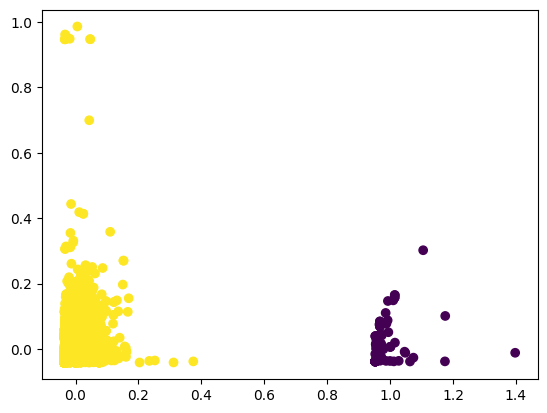

In [65]:
k = KMeans(K=2, max_iters=100)
y_pred = k.predict(X_projected)
plt.scatter(X_projected[:,0], X_projected[:,1], c=y_pred)

## Задание 3

In [66]:
from time import time
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [69]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=1000,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(v2)

In [70]:
tf.shape

(5572, 1000)

In [71]:
lda = LatentDirichletAllocation(n_components=2, max_iter=20, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf)

In [72]:
tf_vectorizer.get_feature_names_out()

array(['00', '000', '03', '04', '0800', '08000839402', '08000930705',
       '0870', '10', '100', '10p', '11', '11mths', '12', '12hrs', '150',
       '150p', '150ppm', '16', '18', '1st', '20', '2003', '2004', '20p',
       '25p', '2day', '2lands', '2nd', '2nite', '30', '3030', '4u', '50',
       '500', '5we', '750', '800', '8007', '86688', '87066', 'abiola',
       'able', 'abt', 'ac', 'accept', 'access', 'account', 'actually',
       'address', 'admirer', 'aft', 'afternoon', 'age', 'age16', 'ago',
       'ah', 'aight', 'al', 'alright', 'amp', 'angry', 'ans', 'answer',
       'anymore', 'anytime', 'apartment', 'apply', 'ard', 'area', 'asap',
       'ask', 'askd', 'asked', 'asking', 'ass', 'attempt', 'auction',
       'available', 'await', 'award', 'awarded', 'away', 'awesome', 'b4',
       'babe', 'baby', 'bad', 'balance', 'bank', 'bath', 'bathe', 'bb',
       'bcoz', 'beautiful', 'bed', 'believe', 'best', 'better', 'big',
       'birthday', 'bit', 'blood', 'blue', 'bluetooth', 'bonus'

In [73]:
# матрица темы-слова
lda.components_.shape

(2, 1000)

In [74]:
# матрица документы-темы
lda.transform(tf).shape

(5572, 2)

In [75]:
print_top_words(lda, tf_vectorizer.get_feature_names_out(), 10)

Topic #0:
just ll know good like come day love ok time
Topic #1:
ur gt lt free text txt lor stop da reply
